<a href="https://colab.research.google.com/github/joaofranca13/ml-experiments/blob/main/car_price_randforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data 

--2022-08-23 02:58:51--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.03s   

2022-08-23 02:58:51 (45.3 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [4]:
df = pd.read_csv("/content/data.csv")

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Preparation

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [7]:
text_cols = list(df.dtypes[df.dtypes == "object"].index)
text_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
for col in text_cols:
  df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## EDA

In [10]:
df.isna().sum().sort_values(ascending=False)

market_category      3742
engine_hp              69
engine_cylinders       30
number_of_doors         6
engine_fuel_type        3
make                    0
model                   0
year                    0
transmission_type       0
driven_wheels           0
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [11]:
for col in df.columns:
  print(col)
  print(df[col].value_counts().head(20))
  print("================")

make
chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
Name: make, dtype: int64
model
silverado_1500        156
tundra                140
f-150                 126
sierra_1500            90
beetle_convertible     89
tacoma                 80
gti                    76
frontier               76
beetle                 75
accord                 75
civic                  68
dakota                 65
ram_pickup_1500        62
jetta                  61
corvette               60
911                    58
c/k_1500_series        56
xc60                   54
colorado               54
3                      53
Name

In [12]:
#sns.pairplot(df)

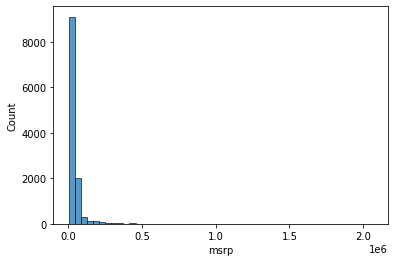

In [13]:
sns.histplot(df['msrp'], bins=50)

In [14]:
df['msrp'].describe().T

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: msrp, dtype: float64

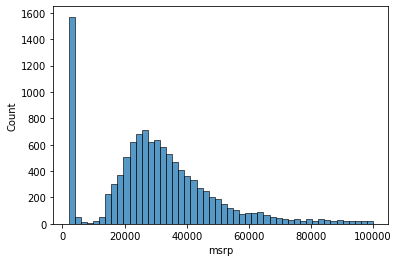

In [15]:
sns.histplot(df['msrp'][df['msrp'] < 100000], bins=50)

In [16]:
df['msrp'][df['msrp'] < 100000].describe().T

count    11276.000000
mean     30476.444395
std      18633.369504
min       2000.000000
25%      20395.000000
50%      29095.000000
75%      39516.250000
max      99950.000000
Name: msrp, dtype: float64

In [17]:
df['msrp_log'] = np.log1p(df['msrp'])

In [18]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,msrp_log
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,10.739349
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650,10.612779
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350,10.500977
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450,10.290483
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500,10.448744


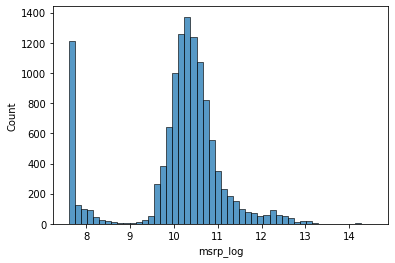

In [19]:
sns.histplot(df['msrp_log'], bins=50)

## Feature Engineering

In [20]:
df.isna().sum().sort_values(ascending=False)

market_category      3742
engine_hp              69
engine_cylinders       30
number_of_doors         6
engine_fuel_type        3
vehicle_style           0
msrp                    0
popularity              0
city_mpg                0
highway_mpg             0
make                    0
vehicle_size            0
model                   0
driven_wheels           0
transmission_type       0
year                    0
msrp_log                0
dtype: int64

In [21]:
df = df.drop(['market_category', 'engine_fuel_type'], axis=1)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,msrp_log
0,bmw,1_series_m,2011,335.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,26,19,3916,46135,10.739349
1,bmw,1_series,2011,300.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,19,3916,40650,10.612779
2,bmw,1_series,2011,300.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,20,3916,36350,10.500977
3,bmw,1_series,2011,230.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,18,3916,29450,10.290483
4,bmw,1_series,2011,230.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,18,3916,34500,10.448744


In [22]:
nas = list(df.columns[df.isna().sum() > 0])
nas


['engine_hp', 'engine_cylinders', 'number_of_doors']

In [23]:
df['engine_hp'].median()

227.0

In [24]:
for col in nas:
  df[col].fillna(df[col].median(), inplace=True)


In [25]:
df.isna().sum().sort_values(ascending=False)

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
msrp_log             0
dtype: int64

In [26]:
curr_year = df['year'].max()

df['age'] =  curr_year - df['year']
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,msrp_log,age
0,bmw,1_series_m,2011,335.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,26,19,3916,46135,10.739349,6
1,bmw,1_series,2011,300.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,19,3916,40650,10.612779,6
2,bmw,1_series,2011,300.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,20,3916,36350,10.500977,6
3,bmw,1_series,2011,230.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,18,3916,29450,10.290483,6
4,bmw,1_series,2011,230.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,18,3916,34500,10.448744,6


In [27]:
df = df.replace({'vehicle_size' : { 'compact' : 1, 'midsize' : 2, 'large' : 3 }})
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,msrp_log,age
0,bmw,1_series_m,2011,335.0,6.0,manual,rear_wheel_drive,2.0,1,coupe,26,19,3916,46135,10.739349,6
1,bmw,1_series,2011,300.0,6.0,manual,rear_wheel_drive,2.0,1,convertible,28,19,3916,40650,10.612779,6
2,bmw,1_series,2011,300.0,6.0,manual,rear_wheel_drive,2.0,1,coupe,28,20,3916,36350,10.500977,6
3,bmw,1_series,2011,230.0,6.0,manual,rear_wheel_drive,2.0,1,coupe,28,18,3916,29450,10.290483,6
4,bmw,1_series,2011,230.0,6.0,manual,rear_wheel_drive,2.0,1,convertible,28,18,3916,34500,10.448744,6


In [28]:
df = df.drop(['model', 'year'], axis=1)
df.head()

,make,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,msrp_log,age
0,bmw,335.0,6.0,manual,rear_wheel_drive,2.0,1,coupe,26,19,3916,46135,10.739349,6
1,bmw,300.0,6.0,manual,rear_wheel_drive,2.0,1,convertible,28,19,3916,40650,10.612779,6
2,bmw,300.0,6.0,manual,rear_wheel_drive,2.0,1,coupe,28,20,3916,36350,10.500977,6
3,bmw,230.0,6.0,manual,rear_wheel_drive,2.0,1,coupe,28,18,3916,29450,10.290483,6
4,bmw,230.0,6.0,manual,rear_wheel_drive,2.0,1,convertible,28,18,3916,34500,10.448744,6


In [29]:
  df = pd.get_dummies(df, columns=list(df.dtypes[df.dtypes == "object"].index))
  df.head()

,engine_hp,engine_cylinders,number_of_doors,vehicle_size,highway_mpg,city_mpg,popularity,msrp,msrp_log,age,...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
0,335.0,6.0,2.0,1,26,19,3916,46135,10.739349,6,...,0,0,1,0,0,0,0,0,0,0
1,300.0,6.0,2.0,1,28,19,3916,40650,10.612779,6,...,1,0,0,0,0,0,0,0,0,0
2,300.0,6.0,2.0,1,28,20,3916,36350,10.500977,6,...,0,0,1,0,0,0,0,0,0,0
3,230.0,6.0,2.0,1,28,18,3916,29450,10.290483,6,...,0,0,1,0,0,0,0,0,0,0
4,230.0,6.0,2.0,1,28,18,3916,34500,10.448744,6,...,1,0,0,0,0,0,0,0,0,0


In [30]:
df.columns

Index(['engine_hp', 'engine_cylinders', 'number_of_doors', 'vehicle_size',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp', 'msrp_log', 'age',
       'make_acura', 'make_alfa_romeo', 'make_aston_martin', 'make_audi',
       'make_bentley', 'make_bmw', 'make_bugatti', 'make_buick',
       'make_cadillac', 'make_chevrolet', 'make_chrysler', 'make_dodge',
       'make_ferrari', 'make_fiat', 'make_ford', 'make_genesis', 'make_gmc',
       'make_honda', 'make_hummer', 'make_hyundai', 'make_infiniti',
       'make_kia', 'make_lamborghini', 'make_land_rover', 'make_lexus',
       'make_lincoln', 'make_lotus', 'make_maserati', 'make_maybach',
       'make_mazda', 'make_mclaren', 'make_mercedes-benz', 'make_mitsubishi',
       'make_nissan', 'make_oldsmobile', 'make_plymouth', 'make_pontiac',
       'make_porsche', 'make_rolls-royce', 'make_saab', 'make_scion',
       'make_spyker', 'make_subaru', 'make_suzuki', 'make_tesla',
       'make_toyota', 'make_volkswagen', 'make_volvo',
       

## Model Validation Framework

In [31]:
X = df.copy()
X_train, X_validate, X_test = np.split(X.sample(frac=1, random_state=0), [int(.6*len(df)), int(.8*len(df))])

In [32]:
print("Full Dataframe: " + str(round(X.shape[0]/X.shape[0], 4)))
print("Train Dataframe: " + str(round(X_train.shape[0]/X.shape[0], 4)))
print("Validation Dataframe: " + str(round(X_validate.shape[0]/X.shape[0], 4)))
print("Test Dataframe: " + str(round(X_test.shape[0]/X.shape[0], 4)))
print("Check (Must be 0): " + str(X.shape[0] - X_train.shape[0] - X_validate.shape[0] - X_test.shape[0]))

Full Dataframe: 1.0
Train Dataframe: 0.6
Validation Dataframe: 0.2
Test Dataframe: 0.2
Check (Must be 0): 0


In [33]:
y_train, y_validate, y_test = X_train["msrp_log"], X_validate["msrp_log"], X_test["msrp_log"]

In [34]:
X_train = X_train.drop(['msrp_log', 'msrp'], axis=1)
X_validate = X_validate.drop(['msrp_log', 'msrp'], axis=1)
X_test = X_test.drop(['msrp_log', 'msrp'], axis=1)

In [35]:
print([len(X_train), len(y_train)])
print([len(X_validate), len(y_validate)])
print([len(X_test), len(y_test)])

[7148, 7148]
[2383, 2383]
[2383, 2383]


In [36]:
X_train.head()

,engine_hp,engine_cylinders,number_of_doors,vehicle_size,highway_mpg,city_mpg,popularity,age,make_acura,make_alfa_romeo,...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
10736,275.0,6.0,3.0,2,19,14,5657,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3828,205.0,6.0,4.0,3,27,17,26,18,0,0,...,0,0,0,0,0,0,0,0,1,0
4554,385.0,8.0,4.0,3,21,15,5657,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2506,485.0,8.0,4.0,3,25,15,1851,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6745,274.0,4.0,4.0,2,23,17,586,11,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
X_train.columns

Index(['engine_hp', 'engine_cylinders', 'number_of_doors', 'vehicle_size',
       'highway_mpg', 'city_mpg', 'popularity', 'age', 'make_acura',
       'make_alfa_romeo', 'make_aston_martin', 'make_audi', 'make_bentley',
       'make_bmw', 'make_bugatti', 'make_buick', 'make_cadillac',
       'make_chevrolet', 'make_chrysler', 'make_dodge', 'make_ferrari',
       'make_fiat', 'make_ford', 'make_genesis', 'make_gmc', 'make_honda',
       'make_hummer', 'make_hyundai', 'make_infiniti', 'make_kia',
       'make_lamborghini', 'make_land_rover', 'make_lexus', 'make_lincoln',
       'make_lotus', 'make_maserati', 'make_maybach', 'make_mazda',
       'make_mclaren', 'make_mercedes-benz', 'make_mitsubishi', 'make_nissan',
       'make_oldsmobile', 'make_plymouth', 'make_pontiac', 'make_porsche',
       'make_rolls-royce', 'make_saab', 'make_scion', 'make_spyker',
       'make_subaru', 'make_suzuki', 'make_tesla', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'transmission_type_automate

In [38]:
def rmse(actual, predicted):
  error = predicted - actual
  mse = (error ** 2).mean()
  rmse = np.sqrt(mse)
  return rmse

## Modelling

In [39]:
reg = RandomForestRegressor(random_state=0).fit(X_train, y_train)

In [40]:
reg.score(X_train, y_train)

0.9968189043777507

In [41]:
y_pred = reg.predict(X_train)


# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The root mean squared error
print("Root mean squared error: %.2f" % rmse(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))

Mean squared error: 0.00
Root mean squared error: 0.06
Coefficient of determination: 1.00


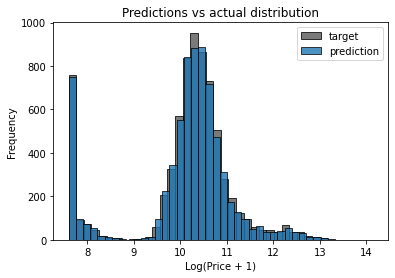

In [42]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

## Validation

In [43]:
X_validate.shape

(2383, 81)

In [44]:
X_train.shape

(7148, 81)

In [45]:
y_pred = reg.predict(X_validate)


# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_validate, y_pred))
# The root mean squared error
print("Root mean squared error: %.2f" % rmse(y_validate, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_validate, y_pred))

Mean squared error: 0.01
Root mean squared error: 0.11
Coefficient of determination: 0.99


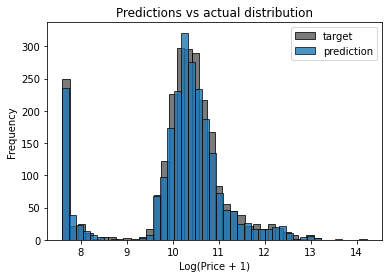

In [46]:
plt.figure(figsize=(6, 4))

sns.histplot(y_validate, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

## Full Training

In [47]:
X_full_train = pd.concat([X_train, X_validate])
X_full_train

,engine_hp,engine_cylinders,number_of_doors,vehicle_size,highway_mpg,city_mpg,popularity,age,make_acura,make_alfa_romeo,...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
10736,275.0,6.0,3.0,2,19,14,5657,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3828,205.0,6.0,4.0,3,27,17,26,18,0,0,...,0,0,0,0,0,0,0,0,1,0
4554,385.0,8.0,4.0,3,21,15,5657,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2506,485.0,8.0,4.0,3,25,15,1851,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6745,274.0,4.0,4.0,2,23,17,586,11,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,166.0,4.0,4.0,1,25,19,481,5,0,0,...,0,0,0,0,0,0,0,0,0,0
9012,285.0,8.0,3.0,3,17,11,549,2,0,0,...,0,0,0,0,0,0,0,0,0,0
886,200.0,4.0,4.0,2,26,18,376,20,0,0,...,0,0,0,0,0,0,0,0,0,0
5878,148.0,4.0,4.0,1,37,28,640,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y_full_training = np.concatenate([y_train, y_validate])
len(y_full_training)

9531

In [51]:
reg_full = RandomForestRegressor(random_state=0).fit(X_full_train, y_full_training)

In [61]:
y_pred = reg_full.predict(X_test)


# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The root mean squared error
print("Root mean squared error: %.2f" % rmse(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.02
Root mean squared error: 0.12
Coefficient of determination: 0.99


Text(0.5, 1.0, 'Predictions vs actual distribution')

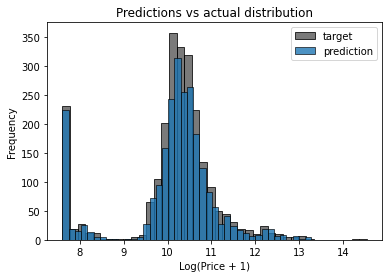

In [62]:
plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')


In [75]:
car = df.iloc[99][df.iloc[20].index.isin(list(X_test.columns))].to_dict()
car = pd.DataFrame([car])
car

,engine_hp,engine_cylinders,number_of_doors,vehicle_size,highway_mpg,city_mpg,popularity,age,make_acura,make_alfa_romeo,...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
0,155.0,4.0,2.0,1.0,26.0,19.0,2009.0,20.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
print(np.expm1(reg_full.predict(car)))
print(df['msrp'].iloc[99])

[3653.63610259]
4182
